In [3]:
import numpy as np
import numpy.linalg
import scipy.linalg
import matplotlib.pyplot as plt
import sklearn

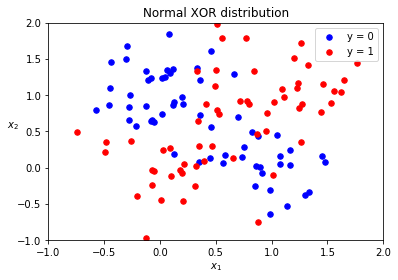

In [43]:
p = 120
sigma = 0.4
xlim = [-1, 2]
ylim = [-1, 2]

#Not working 
# x0 = 0.5 * (np.random.normal([0,1], sigma, [ int(p/2) , 2]) + np.random.normal([1,0], sigma, [ int(p/2) , 2]))
# y0 = np.zeros(int(p/2))
# x1 = 0.5 * (np.random.normal([0,0], sigma, [ int(p/2) , 2]) + np.random.normal([1,1], sigma, [ int(p/2) , 2]))
# y1 = np.ones(int(p/2))

np.random.seed(1)
s1 = np.random.normal(0.5, 0.1, None)
s2 = np.random.normal(0.5, 0.1, None)

p1 = int (int(p/2) * s1)
p2 = int (int(p/2) * s2)

x00 = np.random.normal([0,1], sigma, [ p1 , 2])
x01 = np.random.normal([1,0], sigma, [ int(p/2)-p1 , 2])
y0 = np.zeros(int(p/2))
x10 = np.random.normal([0,0], sigma, [ p2 , 2])
x11 = np.random.normal([1,1], sigma, [ int(p/2)-p2, 2])
y1 = np.ones(int(p/2))

x = np.concatenate((x00, x01, x10, x11), axis=0)
y = np.concatenate((y0, y1), axis=0)
X = np.concatenate((x, y.reshape(p,1)), axis=1)

plt.scatter(x[y == 0, 0], x[y == 0, 1], marker='o', c='b', s = 30, label='y = 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='o', c='r', s = 30, label='y = 1')
lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("Normal XOR distribution")
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

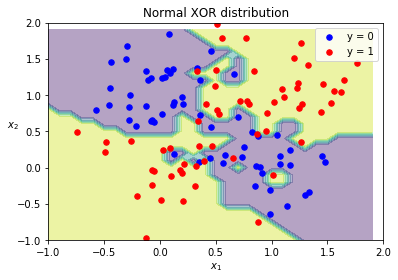

In [45]:
k = 1
tree = sklearn.neighbors.KDTree(x, leaf_size=2) 
xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], 0.1),
                     np.arange(ylim[0], ylim[1], 0.1))

pred = np.zeros((xx.shape[0], xx.shape[1]))
for px in range(xx.shape[0]):
    for py in range(xx.shape[1]):
        dist, ind = tree.query([[xx[py, px], yy[py, px]]], k=k)
        classes = y[ind]
        if np.sum(classes) > (k/2):
            pred[py, px] = 1
        elif np.sum(classes) == (k/2):
            pred[py, px] = 2

plt.contourf(xx, yy, pred, alpha=0.4) 
plt.scatter(x[y == 0, 0], x[y == 0, 1], marker='o', c='b', s = 30, label='y = 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='o', c='r', s = 30, label='y = 1')
lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("kNN Nearest Neighbour")
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

[[0.07593911 0.20688891 0.21532406]] [[0.         0.87480048 0.86511839]]


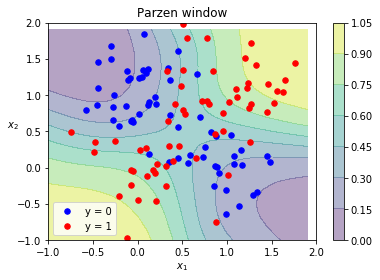

In [58]:
sigma_k = 0.01
tree = sklearn.neighbors.KDTree(x, leaf_size=2) 
xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], 0.1),
                     np.arange(ylim[0], ylim[1], 0.1))

dist, ind = tree.query([[xx[15, 15], yy[15, 15]]], k=3)
kernel = np.exp(- dist**2/ (2 * sigma**2))
print(dist, kernel * y[ind])

pred = np.zeros((xx.shape[0], xx.shape[1]))
for px in range(xx.shape[0]):
    for py in range(xx.shape[1]):
        dist, ind = tree.query([[xx[py, px], yy[py, px]]], k=p)
        kernel = np.exp(- dist**2/ (2 * sigma**2))
        Z = np.sum(kernel)
        pred[py, px] = np.sum(kernel * y[ind]) / Z
        

cont = plt.contourf(xx, yy, pred, alpha=0.4) 
plt.scatter(x[y == 0, 0], x[y == 0, 1], marker='o', c='b', s = 30, label='y = 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='o', c='r', s = 30, label='y = 1')
lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("Parzen window")
plt.xlim(xlim)
plt.ylim(ylim)
plt.colorbar(cont)
plt.show()